In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib notebook
%matplotlib notebook

In [2]:
data = pd.read_csv('german.data', sep=' ')
data.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
A11     999 non-null object
6       999 non-null int64
A34     999 non-null object
A43     999 non-null object
1169    999 non-null int64
A65     999 non-null object
A75     999 non-null object
4       999 non-null int64
A93     999 non-null object
A101    999 non-null object
4.1     999 non-null int64
A121    999 non-null object
67      999 non-null int64
A143    999 non-null object
A152    999 non-null object
2       999 non-null int64
A173    999 non-null object
1       999 non-null int64
A192    999 non-null object
A201    999 non-null object
1.1     999 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.0+ KB


In [4]:
data.describe()

,6,1169,4,4.1,67,2,1,1.1
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
num_vars = data.columns[data.dtypes=='int64']
num_vars
cat_vars = data.columns[data.dtypes=='object'] 
cat_vars

Index(['A11', 'A34', 'A43', 'A65', 'A75', 'A93', 'A101', 'A121', 'A143',
       'A152', 'A173', 'A192', 'A201'],
      dtype='object')

In [6]:
data.isnull().sum()

A11     0
6       0
A34     0
A43     0
1169    0
A65     0
A75     0
4       0
A93     0
A101    0
4.1     0
A121    0
67      0
A143    0
A152    0
2       0
A173    0
1       0
A192    0
A201    0
1.1     0
dtype: int64

In [26]:
num_vars

Index(['6', '1169', '4', '4.1', '67', '2', '1', '1.1'], dtype='object')

In [37]:
data.nunique()

A11       4
6        33
A34       5
A43      10
1169    921
A65       5
A75       5
4         4
A93       4
A101      3
4.1       4
A121      4
67       53
A143      3
A152      3
2         4
A173      4
1         2
A192      2
A201      2
1.1       2
dtype: int64

In [7]:
# data.select_dtypes(include=['int64']).apply(pd.a, downcast=np.int16)
data[num_vars] = data[num_vars].apply(lambda x: x.astype(np.int16))
data[cat_vars] = data[cat_vars].apply(lambda x: x.astype('category'))
for col in cat_vars:
    num_unique_values = len(data[col].unique())
    num_total_values = len(data[col])
    if num_unique_values / num_total_values < 0.5:
        data.loc[:,col] = data[col].astype('category')
    else:
        pass
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
A11     999 non-null category
6       999 non-null int16
A34     999 non-null category
A43     999 non-null category
1169    999 non-null int16
A65     999 non-null category
A75     999 non-null category
4       999 non-null int16
A93     999 non-null category
A101    999 non-null category
4.1     999 non-null int16
A121    999 non-null category
67      999 non-null int16
A143    999 non-null category
A152    999 non-null category
2       999 non-null int16
A173    999 non-null category
1       999 non-null int16
A192    999 non-null category
A201    999 non-null category
1.1     999 non-null int16
dtypes: category(13), int16(8)
memory usage: 30.6 KB


<IPython.core.display.Javascript object>


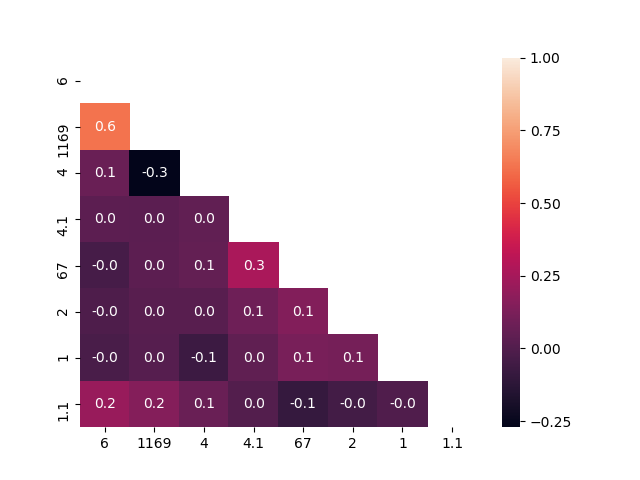

In [12]:
# %matplotlib inline
# %matplotlib notebook
%matplotlib notebook
# %matplotlib notebook
corr = data[num_vars].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask, annot=True, fmt=".1f")

<IPython.core.display.Javascript object>


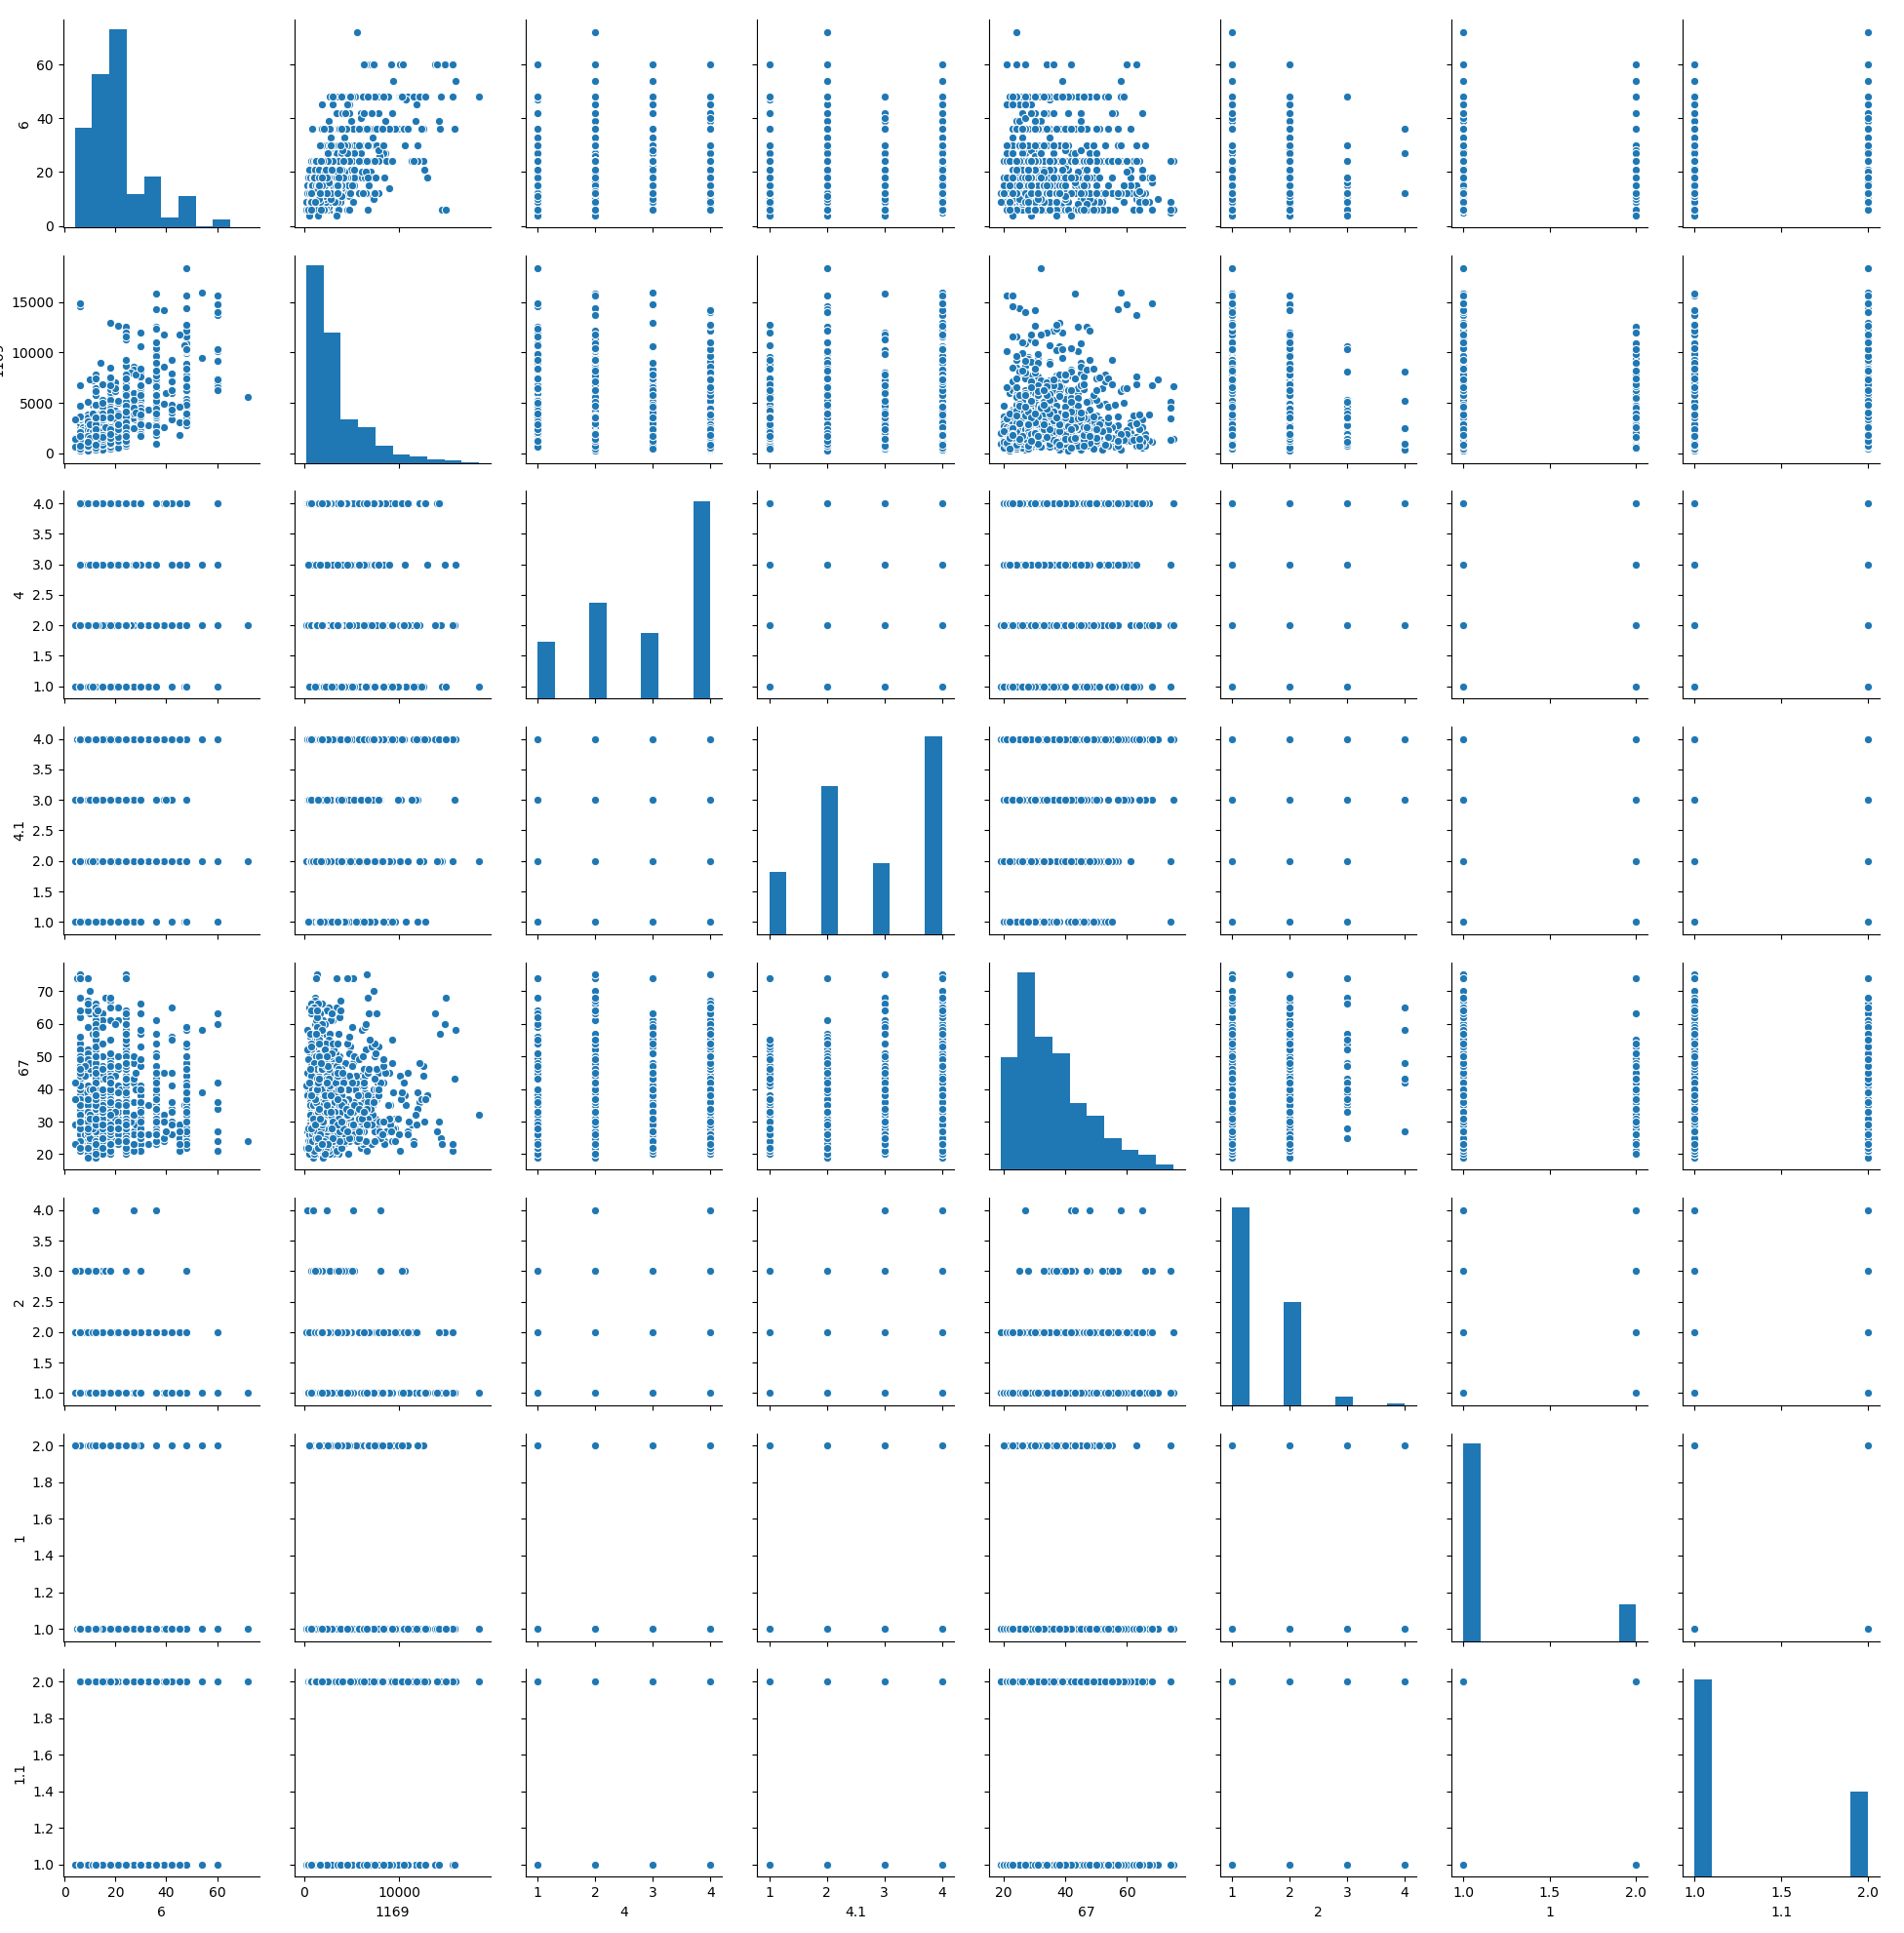

In [13]:
sns.pairplot(data[num_vars])